In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from IPython.display import Image
from prob5_AE import AE
from prob6_CAE import CAE
from prob6_CAE_skip import CAE_skip, train_log, test, main_wrapper
from torchvision import datasets

## Problem 3

Let
$$
 x = \begin{bmatrix}
  0.05  \\
  0.1 
\end{bmatrix},
$$

$$
 y = \begin{bmatrix}
  0.01  \\
  0.99
\end{bmatrix},
$$

$$
W^2=
\begin{bmatrix}
  0.15 & 0.25 \\
  0.2 & 0.3
\end{bmatrix}=\begin{bmatrix}
  w^2_{1,1} & w^2_{1,2} \\
  w^2_{2,1} & w^2_{2,2}
\end{bmatrix},
$$

$$
 b^2 = \begin{bmatrix}
  0.35  \\
  0.35 
\end{bmatrix}= \begin{bmatrix}
  b^1_1  \\
  b^1_2 
\end{bmatrix},
$$


$$
W^3=
\begin{bmatrix}
  0.4 &  0.5\\
  -0.45 & 0.55
\end{bmatrix}=\begin{bmatrix}
  w^3_{1,1} & w^3_{1,2} \\
  w^3_{2,1} & w^3_{2,2}
\end{bmatrix},
$$

$$
 b^3 = \begin{bmatrix}
  0.6  \\
  0.6 
\end{bmatrix}= \begin{bmatrix}
  b^2_1  \\
  b^2_2 
\end{bmatrix}.
$$


In [3]:
# x matrix
x = np.array([[0.05], [0.1]])

# y matrix
y = np.array([[0.01], [0.99]])

# W2 matrix
W2 = np.array([[0.15, 0.25], [0.2, 0.3]])

# b2 matrix
b2 = np.array([[0.35], [0.35]])

# W3 matrix
W3 = np.array([[0.4, 0.5], [-0.45, 0.55]])

# b3 matrix
b3 = np.array([[0.6], [0.6]])

Then the output of the neural network for an input $x$ is 
$$\sigma(W^2(\sigma(W^1x+b^1))+b^2).$$

The intermediate values are

In [4]:
z2 = np.dot(W2, x) + b2
a2 = 1 / (1 + np.exp(-z2))
z3 = np.dot(W3, a2) + b3
a3 = 1 / (1 + np.exp(-z3))

We can calculate the $\delta^1,\delta^2, \delta^3$ with the central equations of the back-propagation algorithm:
$$
\begin{aligned}
& \delta^L=\nabla_a C \odot \sigma^{\prime}\left(z^L\right) \\
& \delta^l=\left(\left(w^{l+1}\right)^T \delta^{l+1}\right) \odot \sigma^{\prime}\left(z^l\right) \\
\end{aligned}
$$


For the cross entropy-loss in combination with the sigmoid activation function, we have
$$
\begin{aligned}
	\frac{\partial C}{\partial z}&=-\frac{1}{n} \sum_x\left(\frac{y}{\sigma(z)}-\frac{1-y}{1-\sigma(z)}\right) \frac{\partial \sigma}{\partial z}
	\\&=-\frac{1}{n} \sum_x\left(\frac{y}{\sigma(z)}-\frac{1-y}{1-\sigma(z)}\right) \sigma(z)(1-\sigma(z))
	\\&=-\frac{1}{n} \sum_x y(1-\sigma(z)) -\sigma(z) (1-y)
	\end{aligned}
$$

In [6]:
delta3 = - (y*(1-a3)-a3*(1-y)) 
delta3

array([[ 0.74693192],
       [-0.33064048]])

Now for the intermediate values we have

In [ ]:
delta2 = np.dot(W3.T, delta3) * a2 * (1 - a2)
delta2

In [9]:
delta1 = np.dot(W2.T, delta2) * x * (1 - x)
delta1

array([[0.00120696],
       [0.00367308]])

# Problem 4

sample input data

In [3]:
input = torch.randn(1,50,50)

In [4]:
m = nn.Conv2d(1, 1, 4, stride=1, padding = 1)
output = m(input)
#dimensions of output
print(output.shape)

torch.Size([1, 49, 49])


In [5]:
m = nn.Conv2d(1, 1, 8, stride=5, padding = 0)
output = m(input)
print(output.shape)

torch.Size([1, 9, 9])


In [6]:
#max-pooling
m = nn.MaxPool2d(kernel_size= 10, stride=2, padding = 2)
output = m(input)
print(output.shape)

torch.Size([1, 23, 23])


In [7]:
#max-pooling
m = nn.MaxPool2d(kernel_size= 2, stride=1, padding = 0)
output = m(input)
print(output.shape)

torch.Size([1, 49, 49])


Problem 4.2

In [8]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

ntest = 2000
test_data = (mnist_testset.data.to(dtype=torch.float32)[:ntest]/255).view(-1, 1, 28, 28)
test_labels = mnist_testset.targets.to(dtype=torch.long)[:ntest]

after runnign the code we have 

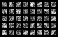

In [9]:
#show prob4_CNN.png
Image(filename='prob4_CNN.png', width=800)

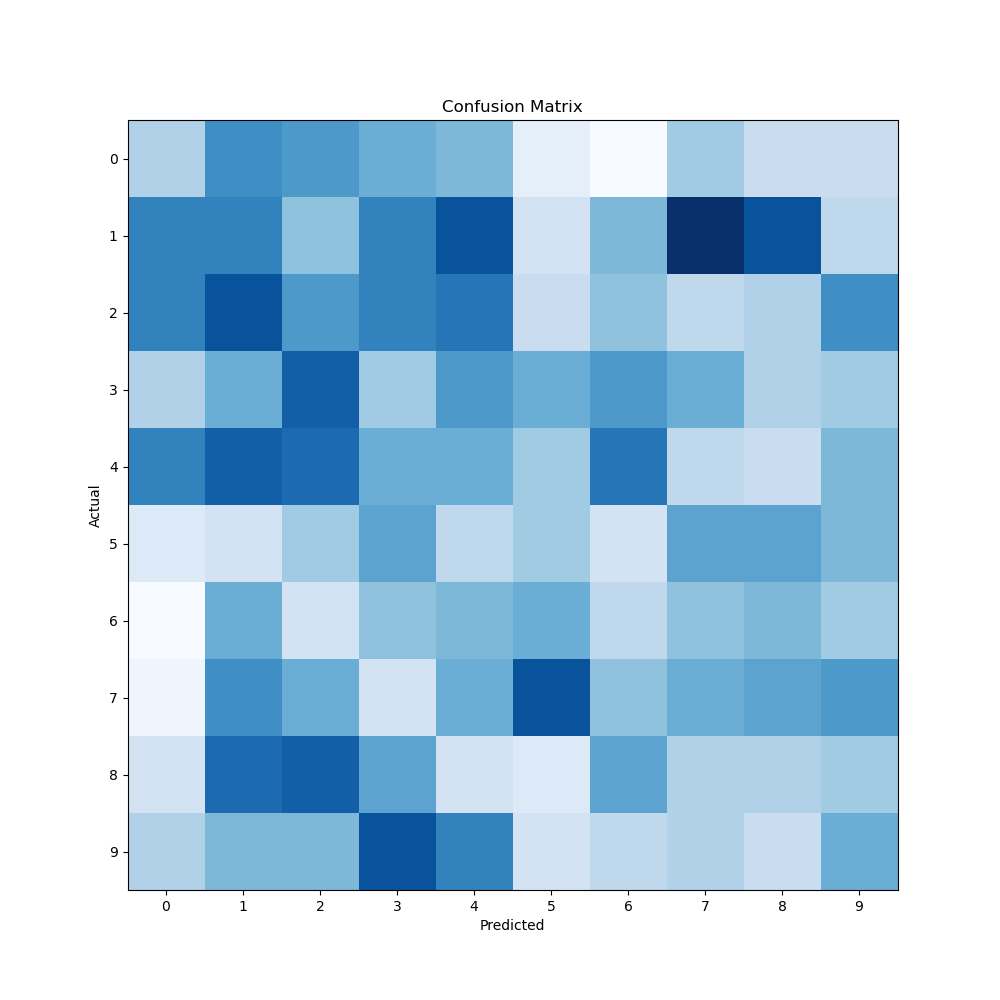

In [10]:
Image(filename='prob4_confusion_matrix.png', width=800)

1 and 7 are confused, which makes sense. 9 and 3 are confused, which makes sense.

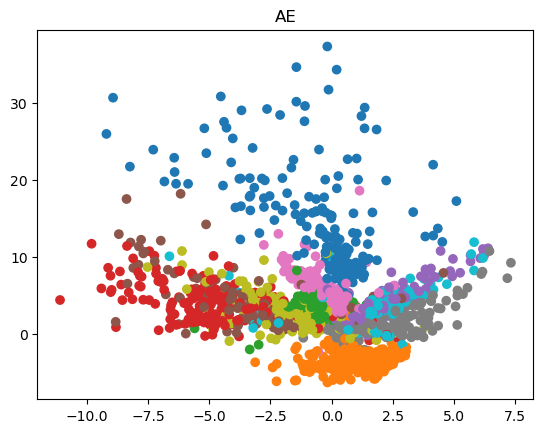

In [11]:
test_data_flat = test_data.reshape(-1, 28*28)

model = AE()
model.load_state_dict(torch.load('mnist_ae.pt'))

embedded_ae = model.encoder(test_data_flat)
embedded_ae = embedded_ae.detach().numpy()

plt.figure()
plt.scatter(embedded_ae[:,0], embedded_ae[:,1], c=test_labels, cmap='tab10')
plt.title('AE')
plt.show()

We see that 5 and 3 are harder to seperate which agrees with our domain knowledge. 7 is similar to 9.

For Problem 5.4, 

Problem 5

Problem 5.1
1) In a classical auto encoder, bow tie architercutre the middle layer is called the bottlenec. The dimension of the bottleneck is chosen to be drastically different from the input and output layer. This way it is impossible for the NN to simply copy the input to the output.
2) By introducing regularisation/corruption, we introduce a preference for some solution compared to others. Typically this prohibits the NN from simply copying the input to the output. 
3) For an input sample X, we can perturb it to $\tidle{X}$. We train the NN to compare the output of X to $\tidle{X}$. This way the NN learns to ignore the perturbations and focus on the important features of the input. 

Problem 5.2
We can add gaussian noise to a sample to corrupt it.

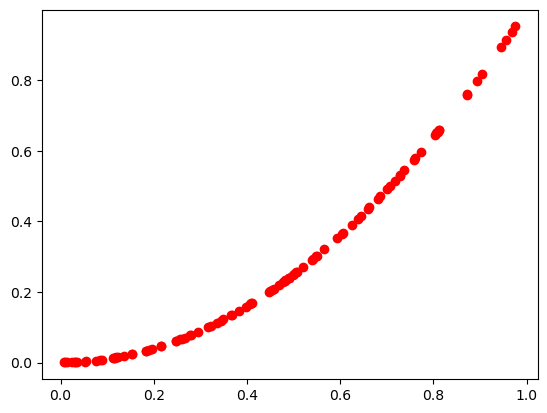

In [12]:
#generate 1000 random numbers uniformly distributed between 0 and 1
x = np.random.rand(100)
y = x**2

plt.plot(x,y, 'ro')

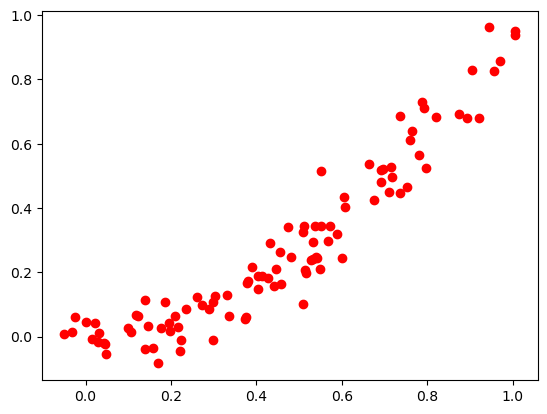

In [13]:
#add gaussian noise to x and y
x_corrupt = x + np.random.randn(100)*0.05
y_corrupt = y + np.random.randn(100)*0.05

plt.plot(x_corrupt,y_corrupt, 'ro')

Problem 5.3
It can mathematically be shown that an autoencoder with a single linear layer is equivalent to PCA. This is because PCA is a linear transformation that tries to find the directions of maximum variance in the data. The autoencoder with a single linear layer tries to find a subspace which preserves as much information as possible, s.t. the reconstruction loss is reduced.

Problem 5.4

Regular autoencoder

In [14]:
model = AE()
model.load_state_dict(torch.load('mnist_ae.pt'))

<All keys matched successfully>

In [15]:
test_data_flat = test_data.reshape(-1, 28*28)
embedded_ae = model.encoder(test_data_flat)
decoded = model.decoder(embedded_ae)

Problem 6

Convolutional auto encoder without skip connections

In [16]:
model_cae = CAE()
model_cae.load_state_dict(torch.load('mnist_cae.pt'))

<All keys matched successfully>

In [17]:
embedded_cae = model_cae.encoder(test_data)
decoded_cae = model_cae.decoder(embedded_cae)

Convolutional auto encoder with skip connections

In [18]:
model_cae_skip = CAE_skip()
model_cae_skip.load_state_dict(torch.load('mnist_cae_skip.pt'))

<All keys matched successfully>

In [19]:
embedded_cae_skip, x4, x1 = model_cae_skip.encoder(test_data)
decoded_cae_skip = model_cae_skip.decoder(embedded_cae, x4, x1)

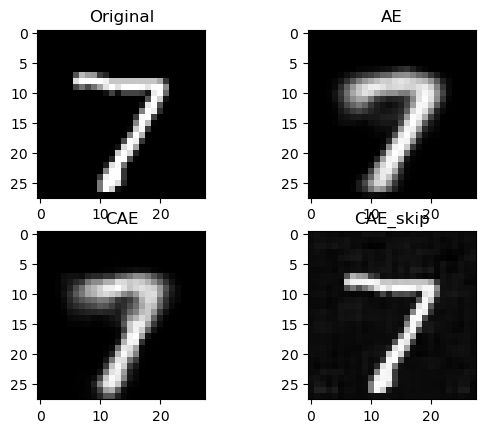

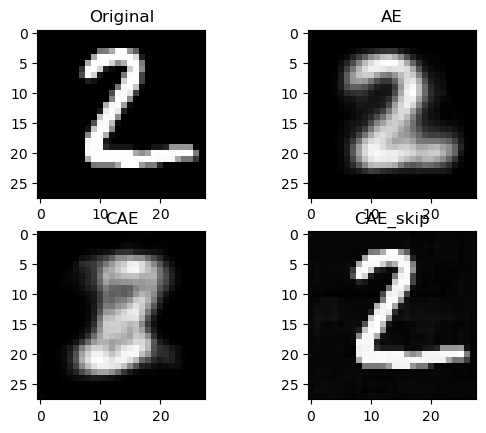

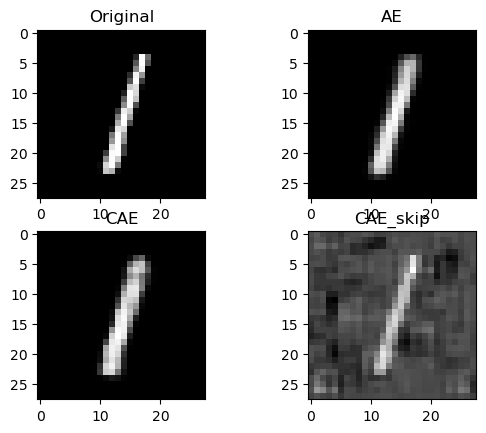

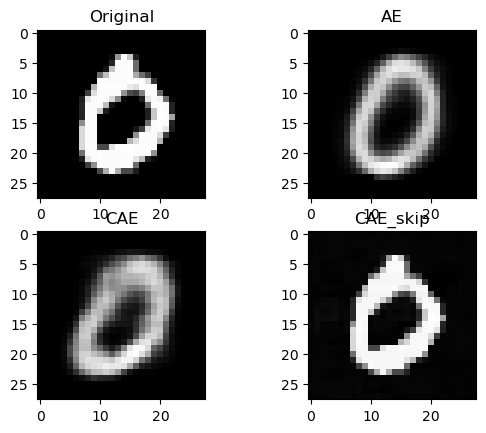

In [20]:
#plot test_data and reconstructed images
for i in range(4):
        #original image
        input_i = test_data[i].detach().numpy()
        #ae
        output_i_ae = decoded[i].detach().numpy()
        #cae
        output_i_cae = decoded_cae[i].detach().numpy()
        #cae_skip
        output_i_cae_skip = decoded_cae_skip[i].detach().numpy()

        input_i = input_i.reshape(28,28)
        output_i_ae = output_i_ae.reshape(28,28)
        output_i_cae = output_i_cae.reshape(28,28)
        output_i_cae_skip = output_i_cae_skip.reshape(28,28)
        
        #plot data and output next to each other
        plt.figure()
        plt.subplot(2,2,1)
        plt.imshow(input_i, cmap='gray')
        plt.title('Original')
        plt.subplot(2,2,2)
        plt.imshow(output_i_ae, cmap='gray')
        plt.title('AE')
        plt.subplot(2,2,3)
        plt.imshow(output_i_cae, cmap='gray')
        plt.title('CAE')
        plt.subplot(2,2,4)
        plt.imshow(output_i_cae_skip, cmap='gray')
        plt.title('CAE_skip')
        plt.show()
        

In [21]:
embedded_ae = embedded_ae.detach().numpy()
embedded_cae = embedded_cae.detach().numpy()
embedded_cae_skip = embedded_cae_skip.detach().numpy()

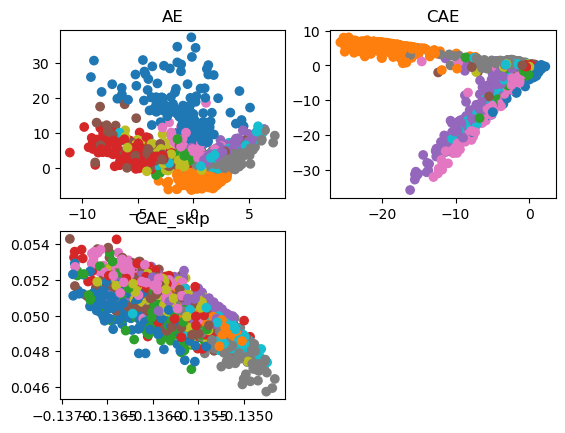

In [22]:
#plot embedded, embedded_cae, embedded_cae_skip
plt.figure()
plt.subplot(2,2,1)
plt.scatter(embedded_ae[:,0], embedded_ae[:,1], c=test_labels, cmap='tab10')
plt.title('AE')
plt.subplot(2,2,2)
plt.scatter(embedded_cae[:,0], embedded_cae[:,1], c=test_labels, cmap='tab10')
plt.title('CAE')
plt.subplot(2,2,3)
plt.scatter(embedded_cae_skip[:,0], embedded_cae_skip[:,1], c=test_labels, cmap='tab10')
plt.title('CAE_skip')
plt.show()

TODO write
We see that 5 and 3 are harder to seperate which agrees with our domain knowledge. 7 is similar to 9.

With Corruption

In [23]:
args =  dict(batch_size=64, 
        test_batch_size=1000, 
        epochs=10, 
        momentum=0.5,
        no_cuda=False,
        seed=1,
        log_interval=10,
        save_model=True)

kwargs = {'num_workers': 1, 'pin_memory': True} if not args['no_cuda'] else {}

In [24]:
# Download the MNIST dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

# training data
ntrain = 60000
train_data = (mnist_trainset.data.to(dtype=torch.float32)[:ntrain]/255).view(-1, 1, 28, 28)
train_labels = mnist_trainset.targets.to(dtype=torch.long)[:ntrain]

    # testing data
ntest = 2000
test_data = (mnist_testset.data.to(dtype=torch.float32)[:ntest]/255).view(-1, 1, 28, 28)
test_labels = mnist_testset.targets.to(dtype=torch.long)[:ntest]

    # Load into torch datasets
train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=args['batch_size'], drop_last=True, shuffle=True, **kwargs
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=args['test_batch_size'], drop_last=True, shuffle=True, **kwargs
)

In [25]:
#add gaussian noise with variance 0.3 to train_loader   
train_data_corrupt = train_data + torch.randn(train_data.shape)*0.3   

train_dataset_corrupt = torch.utils.data.TensorDataset(train_data_corrupt, train_labels)
train_loader_corrupt = torch.utils.data.DataLoader(
    train_dataset_corrupt, batch_size=args['batch_size'], drop_last=True, shuffle=True, **kwargs
)

#add gaussian noise to test_loader
test_data_corrupt = test_data + torch.randn(test_data.shape)*0.3

test_dataset_corrupt = torch.utils.data.TensorDataset(test_data_corrupt, test_labels)
test_loader_corrupt = torch.utils.data.DataLoader(
    test_dataset_corrupt, batch_size=args['test_batch_size'], drop_last=True, shuffle=True, **kwargs
)

Training the autoencoder with corruption

Training the convolutional autoencoder with corruption

In [29]:
#main_wrapper(train_loader_corrupt, test_loader_corrupt, CAE(), file_name = 'mnist_cae_corrupt.pt')

mnist_cae_corrupt = CAE()
mnist_cae_corrupt.load_state_dict(torch.load('mnist_cae_corrupt.pt'))

<All keys matched successfully>

TTraining the convolutional autoencoder with skip with corruption

In [28]:
#main_wrapper(train_loader_corrupt, test_loader_corrupt, CAE_skip(), file_name = 'mnist_cae_skip_corrupt.pt')

mnist_cae_skip_corrupt = CAE_skip()
mnist_cae_skip_corrupt.load_state_dict(torch.load('mnist_cae_skip_corrupt.pt'))

Train Epoch:   1 	| Train set: Average loss: 0.0136                                                  
Test set: Average loss: 1.0454

Train Epoch:   2 	| Train set: Average loss: 0.0009                                                  
Test set: Average loss: 0.3776

Train Epoch:   3 	| Train set: Average loss: 0.0003                                                  
Test set: Average loss: 0.1074

Train Epoch:   4 	| Train set: Average loss: 0.0001                                                  
Test set: Average loss: 0.0284

Train Epoch:   5 	| Train set: Average loss: 0.0000                                                  
Test set: Average loss: 0.0089

Train Epoch:   6 	| Train set: Average loss: 0.0000                                                  
Test set: Average loss: 0.0036

Train Epoch:   7 	| Train set: Average loss: 0.0000                                                  
Test set: Average loss: 0.0019

Train Epoch:   8 	| Train set: Average loss: 0.0000           

<All keys matched successfully>

In [32]:
embedded_cae_corrupt = mnist_cae_corrupt.encoder(test_data_corrupt)
decoded_cae_corrupt = mnist_cae_corrupt.decoder(embedded_cae_corrupt)

In [34]:
embedded_cae_skip_corrupt, x4, x1 = mnist_cae_skip_corrupt.encoder(test_data_corrupt)
decoded_cae_skip_corrupt = mnist_cae_skip_corrupt.decoder(embedded_cae_skip_corrupt, x4, x1)

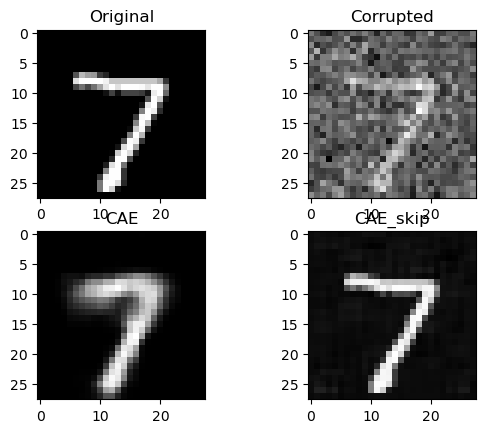

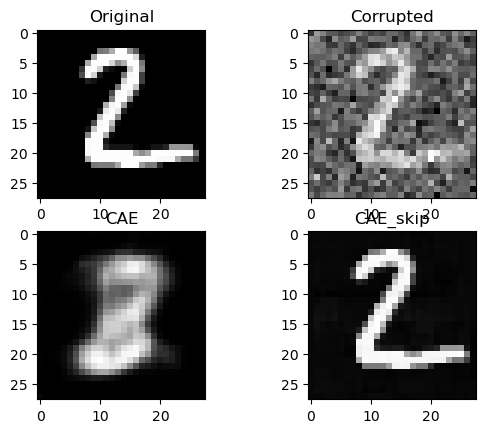

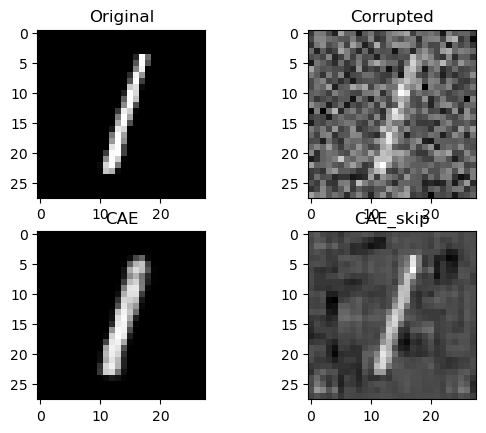

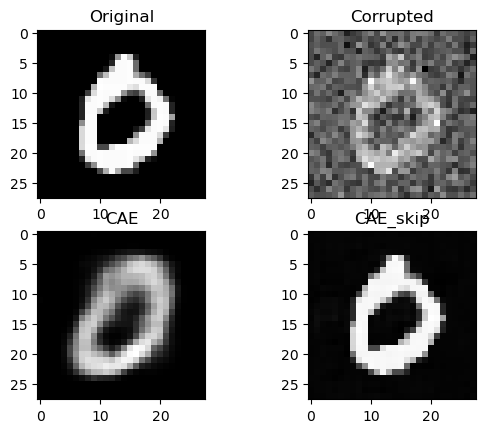

In [36]:
#plot test_data and reconstructed images
for i in range(4):
        #original image
        input_i = test_data[i].detach().numpy()
        #corrupted image
        input_i_corrupt = test_data_corrupt[i].detach().numpy()
        #cae
        output_i_cae = decoded_cae[i].detach().numpy()
        #cae_skip
        output_i_cae_skip = decoded_cae_skip[i].detach().numpy()

        input_i = input_i.reshape(28,28)
        input_i_corrupt = input_i_corrupt.reshape(28,28)
        output_i_cae = output_i_cae.reshape(28,28)
        output_i_cae_skip = output_i_cae_skip.reshape(28,28)
        
        #plot data and output next to each other
        plt.figure()
        plt.subplot(2,2,1)
        plt.imshow(input_i, cmap='gray')
        plt.title('Original')
        plt.subplot(2,2,2)
        plt.imshow(input_i_corrupt, cmap='gray')
        plt.title('Corrupted')
        plt.subplot(2,2,3)
        plt.imshow(output_i_cae, cmap='gray')
        plt.title('CAE')
        plt.subplot(2,2,4)
        plt.imshow(output_i_cae_skip, cmap='gray')
        plt.title('CAE_skip')
        plt.show()
        

For most pictures, the CAE with skip conncetions performs a lot better!

In [38]:
embedded_cae_corrupt = embedded_cae_corrupt.detach().numpy()
embedded_cae_skip_corrupt = embedded_cae_skip_corrupt.detach().numpy()

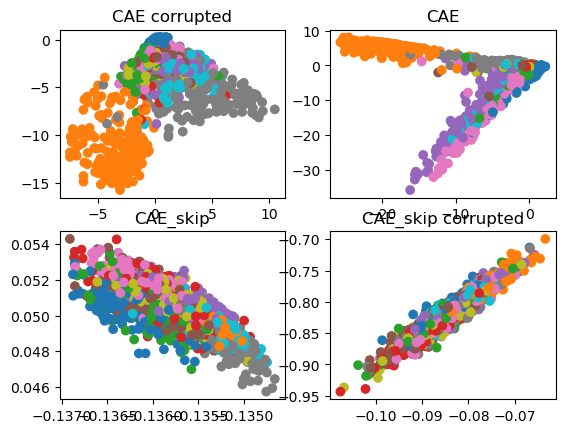

In [39]:
#plot embedded, embedded_cae, embedded_cae_skip
plt.figure()
plt.subplot(2,2,1)
plt.scatter(embedded_cae_corrupt[:,0], embedded_cae_corrupt[:,1], c=test_labels, cmap='tab10')
plt.title('CAE corrupted')
plt.subplot(2,2,2)
plt.scatter(embedded_cae[:,0], embedded_cae[:,1], c=test_labels, cmap='tab10')
plt.title('CAE')
plt.subplot(2,2,3)
plt.scatter(embedded_cae_skip[:,0], embedded_cae_skip[:,1], c=test_labels, cmap='tab10')
plt.title('CAE_skip')
plt.subplot(2,2,4)
plt.scatter(embedded_cae_skip_corrupt[:,0], embedded_cae_skip_corrupt[:,1], c=test_labels, cmap='tab10')
plt.title('CAE_skip corrupted')
plt.show()

The emdedding of the CAE with skip connections is a lot more compact than the other two. 